<a href="https://colab.research.google.com/github/LavrinovYura/TelecomLabs/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Упражнение 1.1**
Посмотреть с помощью chap01.ipynb примеры и пояснения.

# **Упражнение 1.2**
Перейти к http://freesound.org и загрузите образец звука, который включает музыку, речь или другие звуки с четко определенной высотой тона. Выберите сегмент продолжительностью примерно полсекунды, где высота звука постоянна. Вычислите и постройте график спектра выбранного вами сегмента. Какую связь вы можете установить между тембром звука и гармонической структурой, которую вы видите в спектре?

Используйте high_pass, low_pass и band_stop, чтобы отфильтровать некоторые гармоники. Затем преобразуйте спектр обратно в волну и прослушайте его. Как звук соотносится с изменениями, которые вы внесли в спектр?


Ипморт библиотек и файлов:

In [9]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

if not os.path.exists('622902__theoctopus559__piano-keys-x3.wav'):
   !wget  https://github.com/LavrinovYura/TelecomLabs/raw/main/622902__theoctopus559__piano-keys-x3.wav

--2023-05-03 09:54:10--  https://github.com/LavrinovYura/TelecomLabs/raw/main/622902__theoctopus559__piano-keys-x3.wav
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LavrinovYura/TelecomLabs/main/622902__theoctopus559__piano-keys-x3.wav [following]
--2023-05-03 09:54:11--  https://raw.githubusercontent.com/LavrinovYura/TelecomLabs/main/622902__theoctopus559__piano-keys-x3.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2373270 (2.3M) [audio/wav]
Saving to: ‘622902__theoctopus559__piano-keys-x3.wav’

622902__theoctopus5 100%[===================>]   2.26M  --.-KB/s    in 0.06s   

2023-05-03 

Создадим объект `wave` из скачанного звука, создадим сам звук для прослушивания:

In [10]:
from thinkdsp import read_wave

wave = read_wave('622902__theoctopus559__piano-keys-x3.wav')
wave.normalize()
wave.make_audio()

Построим график сегмента нашего звука:

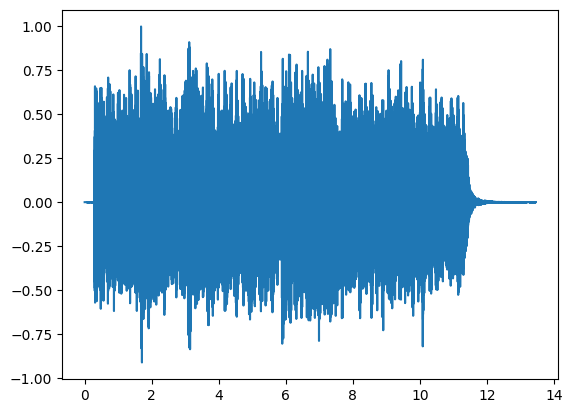

In [11]:
wave.plot()

Выделим полусекундный сегмент, где высота постоянна и послушаем его:

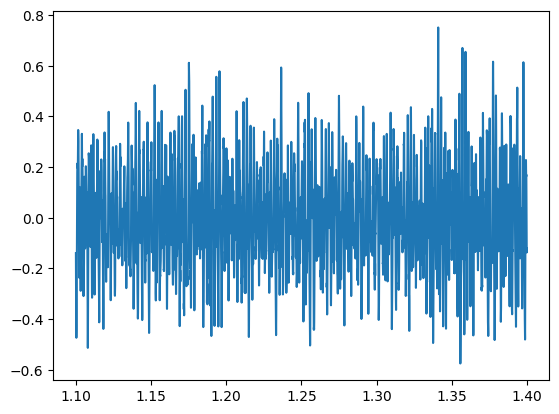

In [13]:
segment = wave.segment(start=1.1, duration=0.3)
segment.plot()
segment.make_audio()

Еще более короткий сегмент

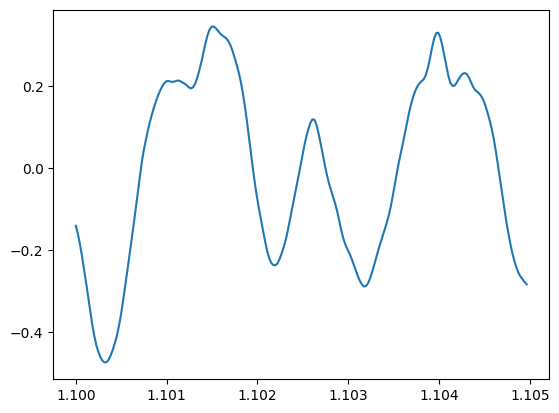

In [14]:
segment.segment(start=1.1, duration=0.005).plot()

Вычислим и выведем спектр выделенного сегмента:

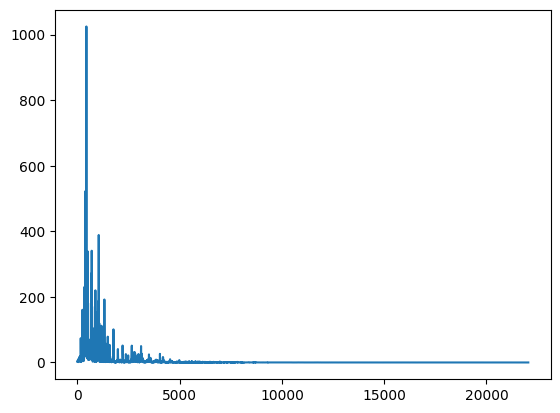

In [19]:
spectrum = segment.make_spectrum()
spectrum.plot()

Исходя из графика, можно сделать вывод, что звук локализован примерно в первых 5 кГц. Выведем спектр этого диапазона:

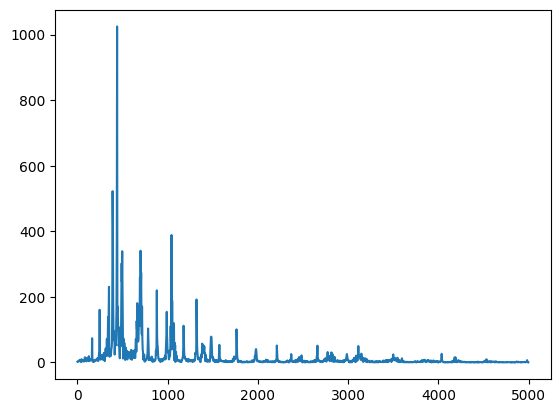

In [20]:
spectrum.plot(high = 5000)

Приблизим диаграмму до 2 кГц:

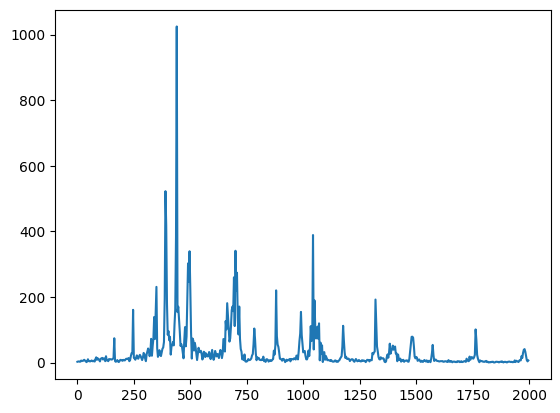

In [21]:
spectrum.plot(2000)

Выделим пиковые частоты:

In [22]:
spectrum.peaks()[:7]

[(1024.8021532280015, 440.0),
 (522.545133164108, 390.0),
 (417.7818415357631, 393.33333333333337),
 (388.82857648337324, 1043.3333333333335),
 (384.36262313906474, 436.6666666666667),
 (340.85938915958684, 700.0),
 (339.3587337412012, 496.6666666666667)]

Видно, что доминирующая частота - 440 Гц (первая в списке).

Воспользуемся `low_pass`, тем самым отфильтруем всё, что выше 2 кГц:

In [23]:
spectrum.low_pass(2000)
filtered = spectrum.make_wave()

Сравним исходный звук (первый) и получившийся отфильтрованный (второй):

In [24]:
segment.make_audio()

In [25]:
filtered.make_audio()

Можно заметить, что звук стал более глухим и звучит, как будто бы он находится в закрытом пространстве. Это произошло из-за обрезания частот, которое привело к изменению формы сигнала и его тембра.

Сейчас мы будем использовать фильтры high_pass и band_stop на выбранном сегменте. Затем мы рассмотрим полученную диаграмму и прослушаем, как звук изменился после одновременного использования фильтра высоких частот (первый метод) и полосно-заграждающего фильтра (второй метод).

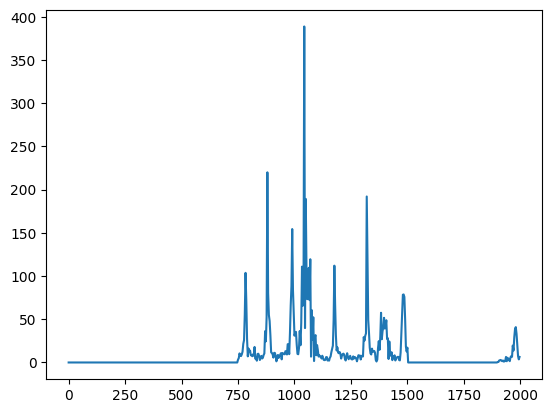

In [28]:
edited = segment.make_spectrum()
edited.high_pass(750)
edited.band_stop(1500,1900)
edited.plot(2000)
edited.make_wave().make_audio()

Заметно (и можно услышать), что звук стал немного более ярким и тонким, похожим на электронное пианино, а не настоящее. Это объяснимо, поскольку мы обрезали большую часть частот, кроме основной, и тем самым лишили звук его объемности.

# **Упражнение 1.3**
Создайте сложный сигнал из объектов SinSignal и CosSignal, суммируя их. Обработайте сигнал для получения wave и прослушайте его. Вычислите Spectrum и распечатайте. Что произойдет при добавлении частот, не кратных основным?

Попробуем просто соеденить 4 ноты До, Ре, Ми, Фа
и отобразим их общую полученую суму




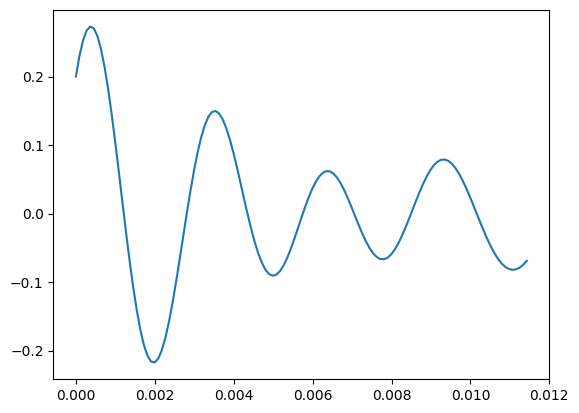

In [37]:
from thinkdsp import SinSignal, CosSignal

sin_DO = SinSignal(freq=261 , amp=0.1)
cos_RE = CosSignal(freq=293, amp=0.1)
sin_MI = SinSignal(freq=330, amp=0.1)
cos_FA = CosSignal(freq=348, amp=0.1)

my_signal = sin_DO + cos_RE + sin_MI + cos_FA
my_signal_wave = my_signal.make_wave(duration=1)
my_signal.plot()
my_signal_wave.make_audio()

Посмотрим спектограмму



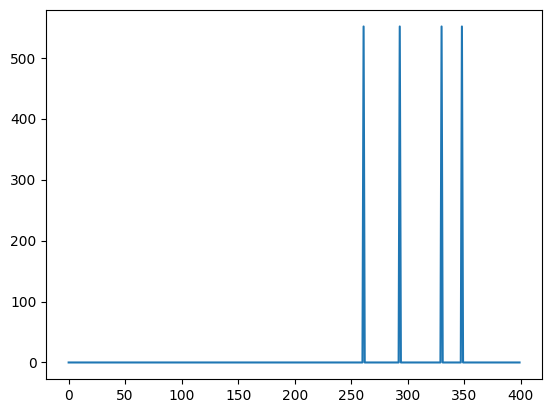

In [38]:
spectrum = my_signal_wave.make_spectrum()
spectrum.plot(high = 400)

Попробуем добавить ноту не кратную ни одной из прежде добавленных

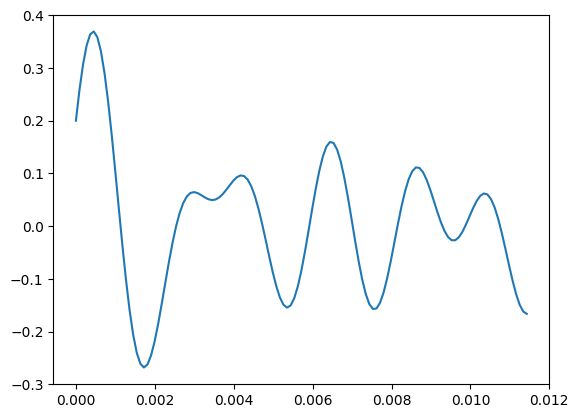

In [45]:
sin_B_bemol = SinSignal(freq=500,amp=0.1)
newSignal = my_signal + sin_B_bemol
newSignal_wave = newSignal.make_wave(duration=1)
newSignal.plot()
newSignal_wave.make_audio()

Получится более отчетливое звучание


Посмотрим его спектограмму

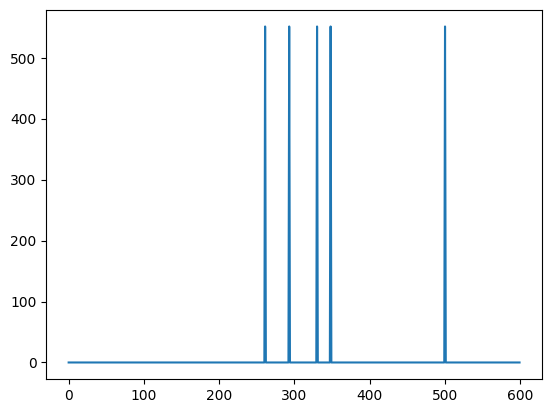

In [43]:
spectrum = newSignal_wave.make_spectrum()
spectrum.plot(high = 600)

# **Упражнение 1.4**
Напишите функцию `stretch`, берущую wave и коэффициент изменения. Она должна ускорять или замедлять сигнал изменением `ts` и `framerate`. Подсказка: должно получиться всего 2 строки кода.

Ниже представлена получившаяся функция:

In [46]:
def stretch(wave, factor):
  wave.ts *= factor
  wave.framerate /= factor

Проверим её на нашем первоначальном звуке. Для начала выведем сам звук и его спектрограмму:

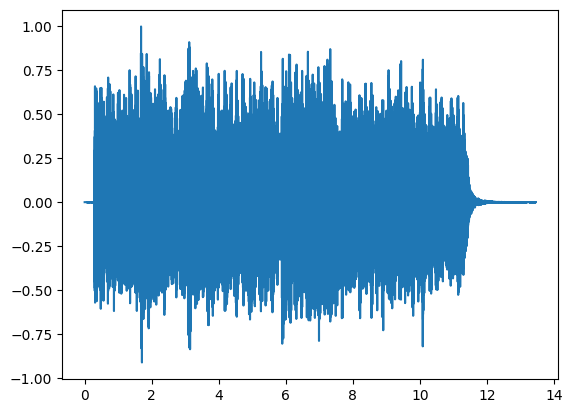

In [48]:
wave = read_wave('622902__theoctopus559__piano-keys-x3.wav')
wave.plot()
wave.make_audio()

Теперь ускорим наш звук в 2 раза:

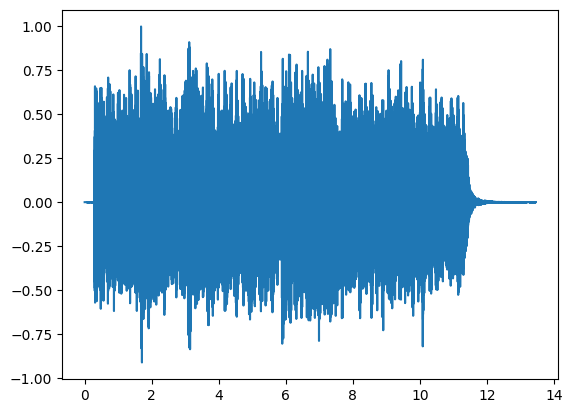

In [52]:
stretch(wave, 0.5)
wave.plot()
wave.make_audio()

Теперь наоборот, замедлим в 2 раза:

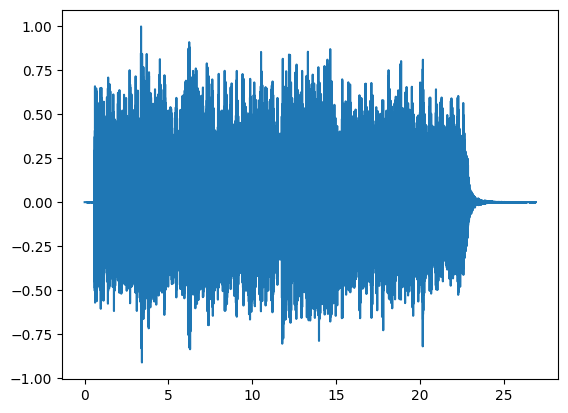

In [51]:
stretch(wave, 2)
wave.plot()
wave.make_audio()